## Classification Problem - Telecom Churn Classification

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\mudit\\Downloads\\telco-customer-churn\\data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#After looking at the above output, we can say that there are 11 missing values for Total Charges.
#Let us replace remove these 11 rows from our data set
#Removing missing values 
data.dropna(inplace = True)

#Remove customer IDs from the data set
data = data.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [9]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
data.gender = [1 if each == "Male" else 0 for each in data.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling']

for item in columns_to_convert:
    data[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data[item]]
    
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


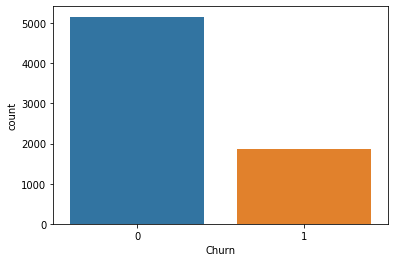

In [11]:
sns.countplot(x="Churn",data=data)

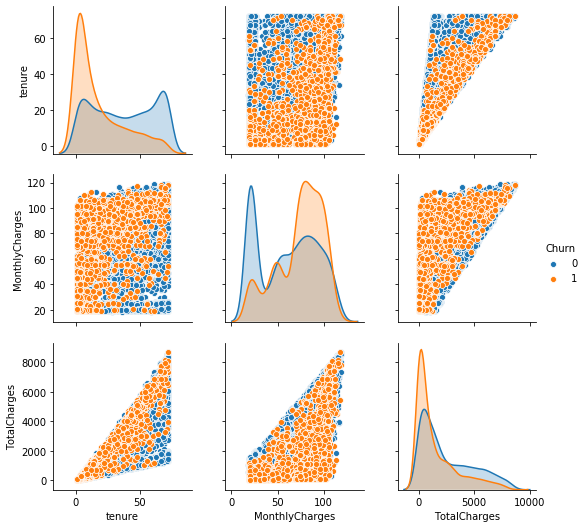

In [12]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")
#People having lower tenure and higher monthly charges are tend to churn more.

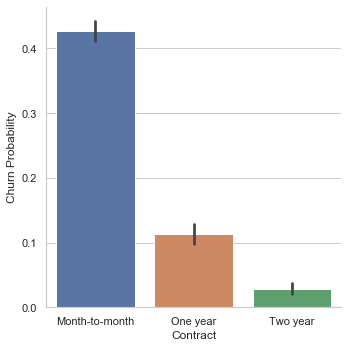

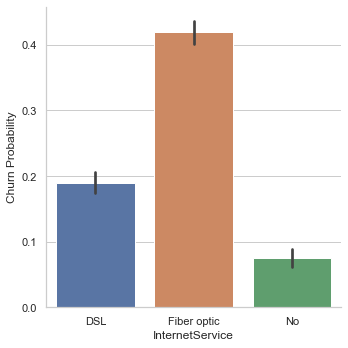

In [13]:
#Also as you can see below; having month-to-month contract and fiber obtic 
#internet have a really huge effect on churn probability.
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=data,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=data,kind="bar")
g2.set_ylabels("Churn Probability")

In [14]:
#Let's convert all the categorical variables into dummy variables
dummies = pd.get_dummies(data)
dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [15]:
print(dummies.corr()["Churn"].sort_values(ascending = False))

Churn                                      1.000000
Contract_Month-to-month                    0.404565
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
StreamingTV                                0.164509
StreamingMovies                            0.162672
SeniorCitizen                              0.150541
DeviceProtection                           0.084402
OnlineBackup                               0.073934
MultipleLines                              0.036148
TechSupport                                0.026744
OnlineSecurity                             0.023014
PhoneService                               0.011691
gender                                    -0.008545
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
InternetService_DSL                       -0.124141
PaymentMetho

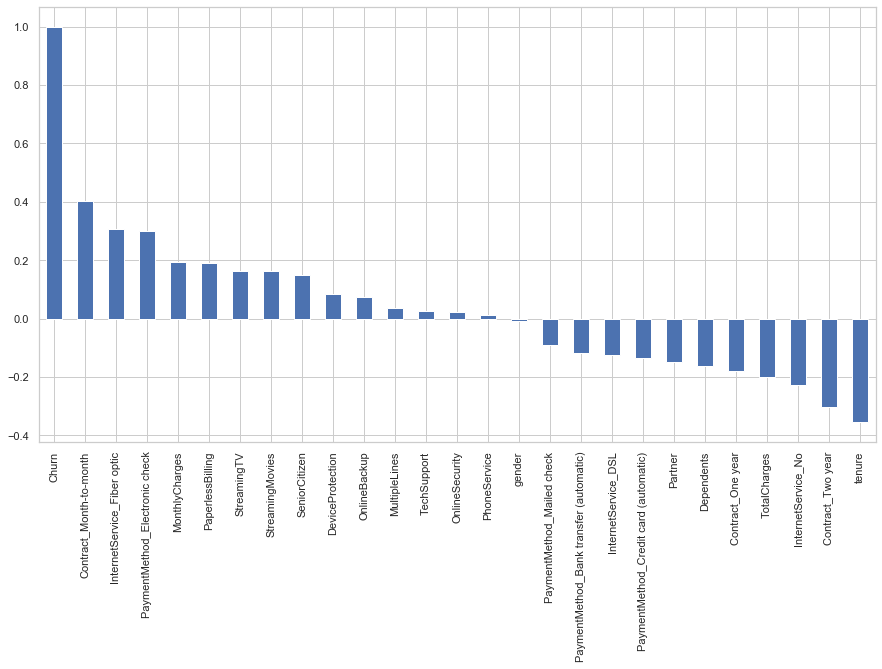

In [16]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [17]:
#Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.
#While, tenure, two year contracts seem to be negatively correlated with churn.

#services such as Online security, streaming TV, online backup, tech support, etc. 
#without internet connection seem to be negatively related to churn

In [18]:
dummies.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [19]:
#assign Class_att column as y attribute
y = dummies.Churn.values

#drop Class_att column, remain only numerical columns
new_data = dummies.drop(["Churn"],axis=1)

In [20]:
#Normalize values to fit between 0 and 1. 
X = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

In [21]:
# we split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


In [22]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [23]:
# bulding the LogR model 
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# bulding the NB model
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
print("Coefficients of the Logistic regression model")
coef = model_lr.coef_
intercept = model_lr.intercept_
print("Coef: ", coef)
print("Intercept: ", intercept)

#building the knn model
model_knn = KNeighborsClassifier(n_neighbors=9) 
model_knn.fit(X_train, Y_train)

Coefficients of the Logistic regression model
Coef:  [[-0.06784674  0.26650735 -0.05332036 -0.10146314 -3.15604559 -0.67881828
   0.49590034 -0.83061071 -0.31283738 -0.13303576 -0.74795754  0.59354281
   0.53276305  0.36943633 -0.13938925  1.22063154  0.10710989  0.96051829
  -1.07143154  0.63182644  0.06020711 -0.69583692 -0.02954629 -0.15508466
   0.28712508 -0.1062975 ]]
Intercept:  [-0.43859402]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [26]:
# predicting train set to calculate acuracy of LR model
predicted_classes_lr = model_lr.predict(X_train)

# predicting train set to calculate acuracy of NB model
predicted_classes_nb = model_nb.predict(X_train)

## predicting train set to calculate acuracy of KNN model
predicted_classes_knn = model_knn.predict(X_train)

Confusion Matrix for LR model::
[[3766  398]
 [ 682  779]]


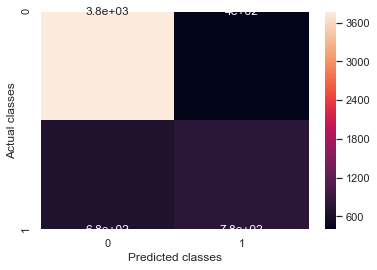

In [27]:
print("Confusion Matrix for LR model::")
conf_mat_lr = confusion_matrix(Y_train.tolist(),predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr,annot = True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

Confusion Matrix for NB model::
[[2884 1280]
 [ 282 1179]]


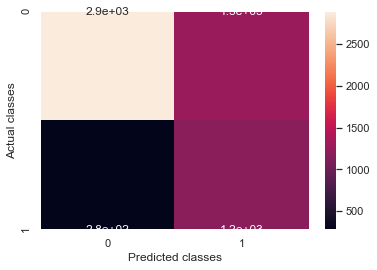

In [28]:
print("Confusion Matrix for NB model::")
conf_mat_nb = confusion_matrix(Y_train.tolist(),predicted_classes_nb)
print(conf_mat_nb)
sns.heatmap(conf_mat_nb,annot = True) #ann = {"ha": 'center',"va": 'center'}
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

Confusion Matrix for Knn model::
[[3772  392]
 [ 613  848]]


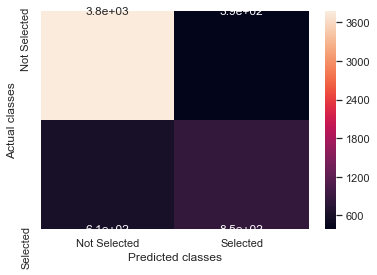

In [29]:
print("Confusion Matrix for Knn model::")
conf_mat_knn = confusion_matrix(Y_train.tolist(),predicted_classes_knn)
print(conf_mat_knn)
sns.heatmap(conf_mat_knn,annot = True, xticklabels = ["Not Selected", "Selected"], yticklabels = ["Not Selected", "Selected"])
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

In [30]:
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

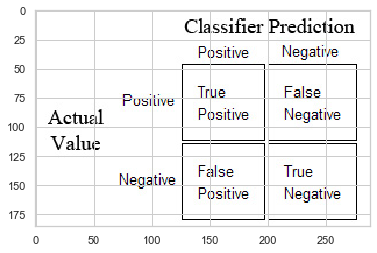

In [31]:
img=mpimg.imread('confusion-matrix.png')
imgplot = plt.imshow(img)
plt.show()

In [32]:
# ### Decision boundary of Logistic Reg classifier
# decision_boundary(X,y,model_lr,"Decision boundary using Logistic Regression")  

In [33]:
# calculate accuracy scores for train sets
accuracy_lr = accuracy_score(Y_train,predicted_classes_lr)
print("accuracy score (train) for LR model::", accuracy_lr)

accuracy_nb = accuracy_score(Y_train,predicted_classes_nb)
print("accuracy score (train) for NB model::", accuracy_nb)

accuracy_knn = accuracy_score(Y_train,predicted_classes_knn)
print("accuracy score (train) for Knn model::", accuracy_knn)


accuracy score (train) for LR model:: 0.808
accuracy score (train) for NB model:: 0.7223111111111111
accuracy score (train) for Knn model:: 0.8213333333333334


In [34]:
### Test SET

predicted_test_classes_lr = model_lr.predict(X_test)
predicted_test_classes_nb = model_nb.predict(X_test)
predicted_test_classes_knn = model_knn.predict(X_test)

In [35]:
print("Confusion Matrix (Test set) for LR model::")
conf_mat_test_lr = confusion_matrix(Y_test.tolist(),predicted_test_classes_lr)
print(conf_mat_test_lr)

print("Confusion Matrix (Test set) for NB model::")
conf_mat_test_nb = confusion_matrix(Y_test.tolist(),predicted_test_classes_nb)
print(conf_mat_test_nb)

print("Confusion Matrix (Test set) for Knn model::")
conf_mat_test_knn = confusion_matrix(Y_test.tolist(),predicted_test_classes_knn)
print(conf_mat_test_knn)

accuracy_test_lr = accuracy_score(Y_test,predicted_test_classes_lr)
print("accuracy score - Log Reg (Test set)::", accuracy_test_lr)

accuracy_test_nb = accuracy_score(Y_test,predicted_test_classes_nb)
print("accuracy score - Naive Bayes (Test set)::", accuracy_test_nb)

accuracy_test_knn = accuracy_score(Y_test,predicted_test_classes_knn)
print("accuracy score - Knn (Test set)::", accuracy_test_knn)


Confusion Matrix (Test set) for LR model::
[[890 109]
 [182 226]]
Confusion Matrix (Test set) for NB model::
[[671 328]
 [ 63 345]]
Confusion Matrix (Test set) for Knn model::
[[869 130]
 [212 196]]
accuracy score - Log Reg (Test set):: 0.7931769722814499
accuracy score - Naive Bayes (Test set):: 0.7221037668798863
accuracy score - Knn (Test set):: 0.7569296375266524


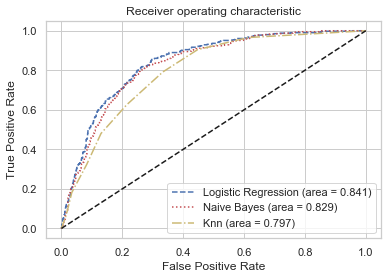

In [36]:
## ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()

logit_roc_auc = roc_auc_score(Y_test, model_lr.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1], drop_intermediate=False) #, drop_intermediate=False
plt.plot(fpr, tpr, 'b--', label='Logistic Regression (area = %0.3f)' % logit_roc_auc)

nb_roc_auc = roc_auc_score(Y_test, model_nb.predict_proba(X_test)[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, model_nb.predict_proba(X_test)[:,1], drop_intermediate=False)
plt.plot(fpr_nb, tpr_nb, 'r:', label='Naive Bayes (area = %0.3f)' % nb_roc_auc)

knn_roc_auc = roc_auc_score(Y_test, model_knn.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, model_knn.predict_proba(X_test)[:,1], drop_intermediate=False)
plt.plot(fpr_knn, tpr_knn, 'y-.', label='Knn (area = %0.3f)' % knn_roc_auc)

plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [37]:
### Finding Optimal Classification Cut-off - Logistic Regression

### Youden's Index
# Youden's Index = J-Statistic = Max_p [Sensitivity(p)+Specificity(p)-1]

tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]
#0.24

,tpr,fpr,thresholds,diff
646,0.855392,0.297297,0.240501,0.558095
647,0.855392,0.298298,0.240245,0.557094
644,0.852941,0.296296,0.242610,0.556645
648,0.855392,0.299299,0.239858,0.556093
645,0.852941,0.297297,0.241168,0.555644


In [38]:
y_pred_prob = model_lr.predict_proba(X_test)
y_pred_class = list(map(lambda x: 1 if x > 0.24 else 0, y_pred_prob[:,1]))
conf_mat_test_lr2 = confusion_matrix(Y_test.tolist(), y_pred_class)
conf_mat_test_lr2

accuracy_test_lr2 = accuracy_score(Y_test, y_pred_class)
print("New accuracy score - Log Reg (Test set)::", accuracy_test_lr2)

New accuracy score - Log Reg (Test set):: 0.746268656716418


In [39]:
# # SVM Classification

In [40]:
from sklearn.svm import SVC
model_svm = SVC(gamma='auto')
model_svm.fit(X_train, Y_train)
SVC(gamma='auto')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
## predicting train set to calculate acuracy of SVM model
predicted_classes_svm = model_svm.predict(X_train)

Confusion Matrix for SVM model::
[[3821  343]
 [ 757  704]]


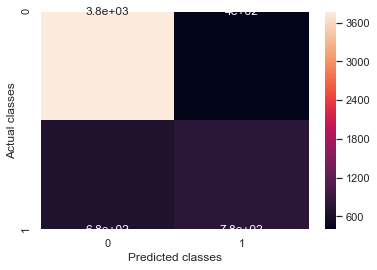

In [42]:
print("Confusion Matrix for SVM model::")
conf_mat_svm = confusion_matrix(Y_train.tolist(),predicted_classes_svm)
print(conf_mat_svm)
sns.heatmap(conf_mat_lr,annot = True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

In [43]:
# calculate accuracy scores for train sets
accuracy_svm = accuracy_score(Y_train,predicted_classes_svm)
print("accuracy score (train) for SVM model::", accuracy_svm)

accuracy score (train) for SVM model:: 0.8044444444444444


In [44]:
### Test SET

predicted_test_classes_svm = model_svm.predict(X_test)

In [45]:
print("Confusion Matrix (Test set) for SVM model::")
conf_mat_test_svm = confusion_matrix(Y_test.tolist(),predicted_test_classes_svm)
print(conf_mat_test_svm)

accuracy_test_svm = accuracy_score(Y_test,predicted_test_classes_svm)
print("accuracy score - SVM (Test set)::", accuracy_test_svm)

Confusion Matrix (Test set) for SVM model::
[[895 104]
 [204 204]]
accuracy score - SVM (Test set):: 0.7810945273631841


In [46]:
print("accuracy score - Log Reg (Test set)::", accuracy_test_lr)
print("accuracy score - Naive Bayes (Test set)::", accuracy_test_nb)
print("accuracy score - SVM (Test set)::", accuracy_test_svm)
print("accuracy score - Knn (Test set)::", accuracy_test_knn)

accuracy score - Log Reg (Test set):: 0.7931769722814499
accuracy score - Naive Bayes (Test set):: 0.7221037668798863
accuracy score - SVM (Test set):: 0.7810945273631841
accuracy score - Knn (Test set):: 0.7569296375266524


In [47]:
#Accuracy is highest for Logistic Regression and SVM Model